# 초기값 다르게 했지만, 전의 내용과 같음

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
P = np.array([[0.7, 0.2, 0.1],  #sunny -> [sunny, cloudy, rainy]
             [0.3, 0.65, 0.05], #cloduy -> [sunny, cloudy, rainy]
             [0.15, 0.35, 0.5]]) #rainy -> [sunny, cloudy, rainy]

In [3]:
using_P = np.array([[P[0][0], P[0][0]+P[0][1], P[0][0]+P[0][1]+P[0][2]],   #sunny -> [sunny, cloudy, rainy]
                    [P[1][0], P[1][0]+P[1][1], P[1][0]+P[1][1]+P[1][2]],   #cloduy -> [sunny, cloudy, rainy]
                    [P[2][0], P[2][0]+P[2][1], P[2][0]+P[2][1]+P[2][2]]])  #rainy -> [sunny, cloudy, rainy]

In [4]:
def MC_weather(N) :
    weather_list = ['3']
    for i in range(N) :
        current_weather = weather_list[-1]
        rd = random.uniform(0, 1)
        if current_weather == '1' :
            if rd <= using_P[0][0] :
                next_weather = '1'
                weather_list.append(next_weather)
            elif using_P[0][0] < rd <= using_P[0][1] :
                next_weather = '2'
                weather_list.append(next_weather)
            elif using_P[0][1] <= rd <= using_P[0][2] :
                next_weather = '3'
                weather_list.append(next_weather)
        elif current_weather == '2' :
            if rd <= using_P[1][0] :
                next_weather = '1'
                weather_list.append(next_weather)
            elif using_P[1][0] < rd <= using_P[1][1] :
                next_weather = '2'
                weather_list.append(next_weather)
            elif using_P[1][1] <= rd <= using_P[1][2] :
                next_weather = '3'
                weather_list.append(next_weather)
        elif current_weather == '3' :
            if rd <= using_P[2][0] :
                next_weather = '1'
                weather_list.append(next_weather)
            elif using_P[2][0] < rd <= using_P[2][1] :
                next_weather = '2'
                weather_list.append(next_weather)
            elif using_P[2][1] <= rd <= using_P[2][2] :
                next_weather = '3'
                weather_list.append(next_weather)
    return weather_list

0 번째 날  0 0 10000
1 번째 날  1537 3444 5019
2 번째 날  2934 4275 2791
3 번째 날  3819 4293 1888
4 번째 날  4132 4319 1549
5 번째 날  4400 4161 1439
6 번째 날  4520 4127 1353
7 번째 날  4647 3999 1354
8 번째 날  4641 3975 1384
9 번째 날  4626 4060 1314


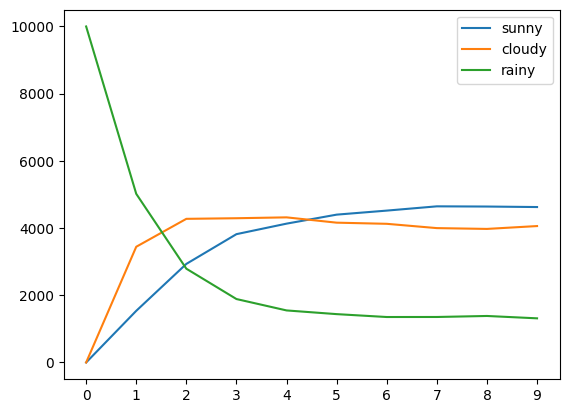

In [5]:
tot_list = []
temp_list = []
for i in range(10000) :
    tot_list.append(MC_weather(10))
b = np.array(tot_list)
for i in range(0, 10) :
    temp_a = list(b[:, i])
    print(i,'번째 날 ', temp_a.count('1'), temp_a.count('2'), temp_a.count('3'))
    temp_list.append([temp_a.count('1'), temp_a.count('2'), temp_a.count('3')])

# t0 = (0.7, 0.2, 0.1) / t10 = (0.5, 0.4, 0.1)
graph = np.array(temp_list)
plt.plot(graph[:,0], label = 'sunny')
plt.plot(graph[:,1], label = 'cloudy')
plt.plot(graph[:,2], label = 'rainy')
plt.xticks(range(10))
plt.legend()
plt.show()

# 0328 마르코프 체인의 수렴
- 초기확률 분포 계산
    - 행렬에서 열은 "sunny", "cloudy", "rainy"
- Monter Carlo 시뮬레이션을 통한 날씨 예측
## 수렴하는 위치 
- 고유값 및 고유벡터 계산
    - 고유벡터를 기준으로 그래프를 그린다.

In [12]:
weather_probability = [[0,0,1]]
day_ago = weather_probability[0]
for _ in range(9) :
    temp_day = np.dot(day_ago, P)
    day_ago = temp_day
    weather_probability.append(list(day_ago))

t = np.array(weather_probability)
sunny = t[:,0]
cloudy = t[:,1]
rainy = t[:,2]
print(t)

[[0.         0.         1.        ]
 [0.15       0.35       0.5       ]
 [0.285      0.4325     0.2825    ]
 [0.371625   0.437      0.191375  ]
 [0.41994375 0.42535625 0.1547    ]
 [0.4447725  0.41461531 0.14061219]
 [0.45681717 0.40766872 0.13551411]
 [0.46239975 0.40377804 0.13382221]
 [0.46488657 0.40177345 0.13333998]
 [0.46595363 0.40079905 0.13324732]]


0 번째 날  0.0 0.0 1.0
1 번째 날  0.1484 0.3473 0.5043
2 번째 날  0.2863 0.4281 0.2856
3 번째 날  0.3749 0.4328 0.1923
4 번째 날  0.4233 0.4228 0.1539
5 번째 날  0.445 0.413 0.142
6 번째 날  0.4552 0.4102 0.1346
7 번째 날  0.4692 0.3999 0.1309
8 번째 날  0.4658 0.4005 0.1337
9 번째 날  0.4645 0.3966 0.1389


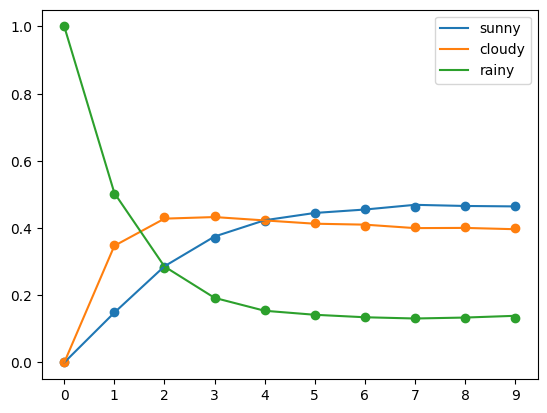

In [13]:
tot_list = []
temp_list = []
for i in range(10000) :
    tot_list.append(MC_weather(10))
b = np.array(tot_list)
for i in range(0, 10) :
    temp_a = list(b[:, i])
    print(i,'번째 날 ', temp_a.count('1')/10000, temp_a.count('2')/10000, temp_a.count('3')/10000)
    temp_list.append([temp_a.count('1')/10000, temp_a.count('2')/10000, temp_a.count('3')/10000])

# t0 = (0.7, 0.2, 0.1) / t10 = (0.5, 0.4, 0.1)
graph = np.array(temp_list)
plt.plot(graph[:,0], label = 'sunny')
plt.plot(graph[:,1], label = 'cloudy')
plt.plot(graph[:,2], label = 'rainy')
plt.scatter(range(10), sunny)
plt.scatter(range(10), cloudy)
plt.scatter(range(10), rainy)
plt.xticks(range(10))
plt.legend()
plt.show()

In [7]:
# 수렴하는 위치
value, vector = np.linalg.eig(np.transpose(P)) # 첫어레이는 고유값, 뒤에는 v1, v2,v3이다
print(value)
print(vector) # 아이덴벡터는 가로
print('----')
v1 = vector[:, 0]
print('v1 : {}'.format(v1))
print('수렴하는 위치', v1 / np.sum(v1))

[1.   +0.j         0.425+0.08291562j 0.425-0.08291562j]
[[ 0.74199852+0.j          0.65465367+0.j          0.65465367-0.j        ]
 [ 0.63599873+0.j         -0.54554473+0.36187343j -0.54554473-0.36187343j]
 [ 0.21199958+0.j         -0.10910895-0.36187343j -0.10910895+0.36187343j]]
----
v1 : [0.74199852+0.j 0.63599873+0.j 0.21199958+0.j]
수렴하는 위치 [0.46666667+0.j 0.4       +0.j 0.13333333+0.j]


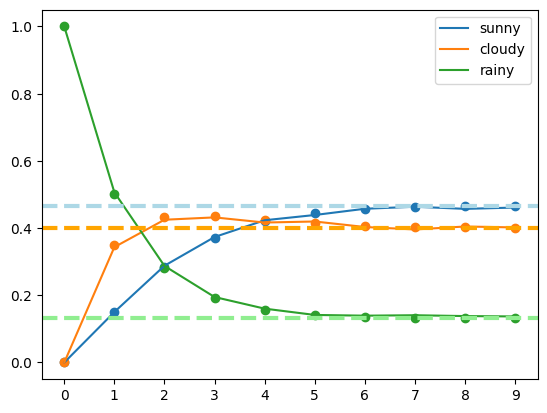

In [78]:
tot_list = []
temp_list = []
for i in range(10000) :
    tot_list.append(MC_weather(10))
b = np.array(tot_list)
for i in range(0, 10) :
    temp_a = list(b[:, i])
    # print(i,'번째 날 ', temp_a.count('1')/10000, temp_a.count('2')/10000, temp_a.count('3')/10000)
    temp_list.append([temp_a.count('1')/10000, temp_a.count('2')/10000, temp_a.count('3')/10000])

# t0 = (0.7, 0.2, 0.1) / t10 = (0.5, 0.4, 0.1)
graph = np.array(temp_list)
plt.plot(graph[:,0], label = 'sunny')
plt.plot(graph[:,1], label = 'cloudy')
plt.plot(graph[:,2], label = 'rainy')
plt.scatter(range(10), sunny)
plt.scatter(range(10), cloudy)
plt.scatter(range(10), rainy)
plt.axhline((v1[0] / np.sum(v1)), 0, 1, color='lightblue', linestyle='--', linewidth = 3)
plt.axhline((v1[1] / np.sum(v1)), 0, 1, color='orange', linestyle='--', linewidth = 3)
plt.axhline((v1[2] / np.sum(v1)), 0, 1, color='lightgreen', linestyle='--', linewidth = 3)
plt.xticks(range(10))
plt.legend()
plt.show()